In [2]:
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from helper import *

In [3]:
def fillEdges(edges):
    # Create a mask for flood fill
    height, width = edges.shape
    mask = np.zeros((height + 2, width + 2), dtype=np.uint8)

    # Flood fill from point (0, 0) with value 255
    floodfilled_edges = edges.copy()
    cv2.floodFill(floodfilled_edges, mask, seedPoint=(0, 0), newVal=255)

    # Invert the flood filled image to get the filled holes
    filled_holes = cv2.bitwise_not(floodfilled_edges)

    # Combine the edges and filled holes
    result = edges | filled_holes
    return result


In [4]:
def fillEdgesV2(edges):
    # Perform morphological closing to fill small gaps
    kernel = np.ones((3, 3), np.uint8)
    closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    return closed_edges

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


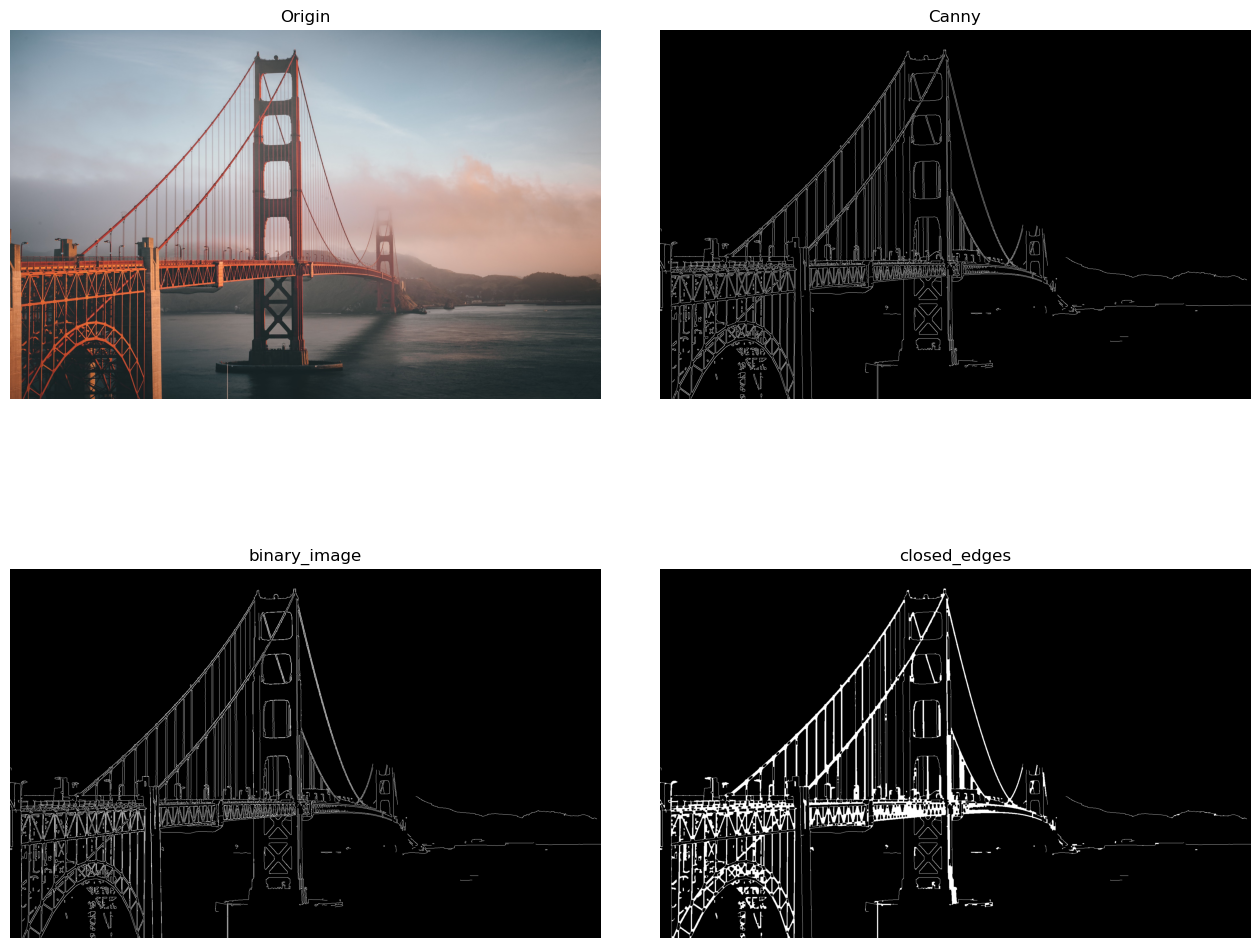

In [5]:
image_path = 'images/bridge2.jpeg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

lower_threshold = 50
upper_threshold = 100

edges = canny_edge_detection(image_path, lower_threshold, upper_threshold)
edges_sobel = sobel_edge_detection(image_path)

filled_edges = fillEdgesV2(edges)
# print(type(edges))

merged_edges = cv2.bitwise_or(edges, edges_sobel)

bool_mask = (edges / 255).astype(bool)

kernel = np.ones((5, 5), np.uint8)
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)


threshold = 127
binary_image = np.where(merged_edges > threshold, 255, 0).astype(np.uint8)

print(closed_edges)

display_images_in_column([image, edges, binary_image, closed_edges], [
                         "Origin", "Canny",  "binary_image", "closed_edges"])
# plt.imshow(image)
# plt.imshow(edges)
